In [30]:
#dep: https://www.colour-science.org/installation-guide/

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import colour
from colour.plotting import *
%matplotlib notebook

In [31]:
%matplotlib notebook

Generate our own michele-levy chart, to demonstrate the power of colour

In [2]:
def mlEQ(lam, ret):
    '''
    lam: wavelength in nm
    ret: retardence in microns
    '''
    return np.sin(np.pi*ret/lam*10**3)**2. #ml equation


In [136]:
lamL = np.arange(360,830,1) #visiable light range 
retL = np.arange(0.4, 0.8, .001) #generate range of rets
I = np.array([[mlEQ(l,r) for l in lamL] for r in retL])
I_indx = np.array([[(l,r) for l in lamL] for r in retL])

In [8]:
I_indx 
# [[I(lam1, r1), I(lam2, r1), ... I(lamN, r1)],
#  [I(lam1, r2), ..., I(lamN, r2)]...]
#This generates list, so for each retardence (row), we find the intensity at each wavelength (cols)


array([[[  3.60000000e+02,   2.50000000e-01],
        [  3.65000000e+02,   2.50000000e-01],
        [  3.70000000e+02,   2.50000000e-01],
        ..., 
        [  8.15000000e+02,   2.50000000e-01],
        [  8.20000000e+02,   2.50000000e-01],
        [  8.25000000e+02,   2.50000000e-01]],

       [[  3.60000000e+02,   2.50500000e-01],
        [  3.65000000e+02,   2.50500000e-01],
        [  3.70000000e+02,   2.50500000e-01],
        ..., 
        [  8.15000000e+02,   2.50500000e-01],
        [  8.20000000e+02,   2.50500000e-01],
        [  8.25000000e+02,   2.50500000e-01]],

       [[  3.60000000e+02,   2.51000000e-01],
        [  3.65000000e+02,   2.51000000e-01],
        [  3.70000000e+02,   2.51000000e-01],
        ..., 
        [  8.15000000e+02,   2.51000000e-01],
        [  8.20000000e+02,   2.51000000e-01],
        [  8.25000000e+02,   2.51000000e-01]],

       ..., 
       [[  3.60000000e+02,   1.49850000e+00],
        [  3.65000000e+02,   1.49850000e+00],
        [  3.700000

In [137]:
#Convert to linear colour space (CIE XYZ), assuming a 'standard' spectral weighting
XYZ = [colour.sd_to_XYZ(colour.SpectralDistribution({
    lam:i for (lam,i) in zip(lamL,iL)}),illuminant=colour.ILLUMINANTS_RELATIVE_SPDS["D65"]) for iL in I]       

In [157]:
#Now, we can convert to rgb for displaying
sRGB = [list(colour.XYZ_to_sRGB(xyz/100)) for xyz in XYZ] 

In [158]:
mlChart = np.array([[i for i in sRGB] for j in np.arange(0,200)])

<IPython.core.display.Javascript object>


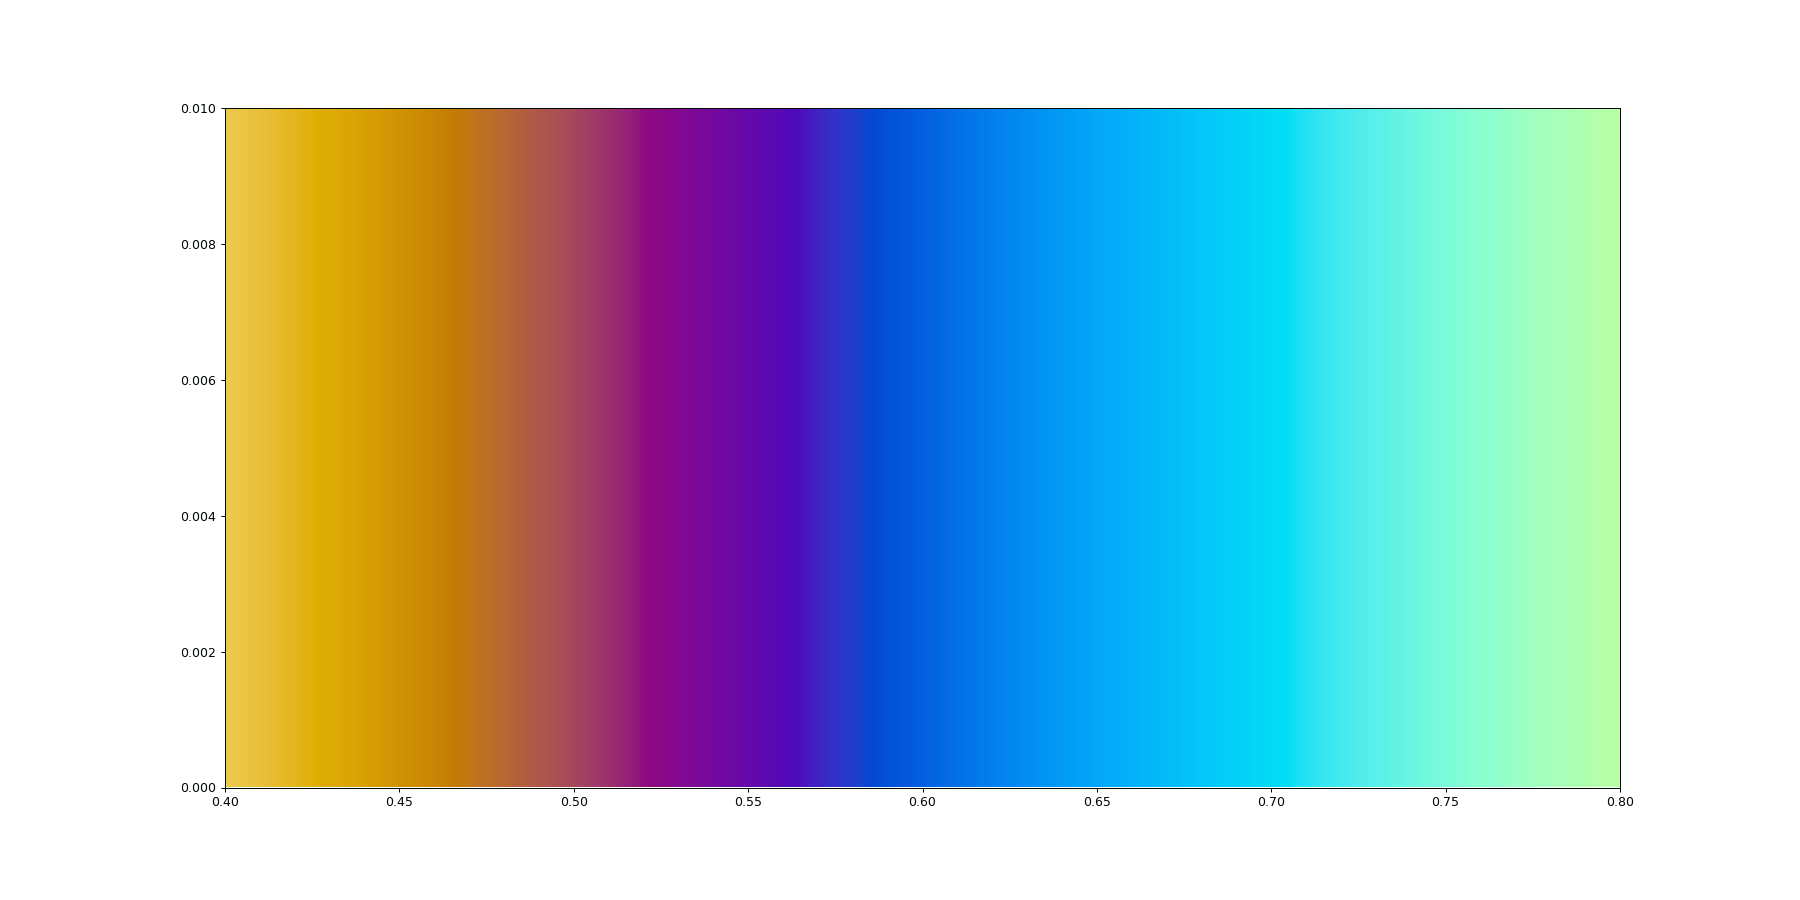

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [159]:
fig,ax = plt.subplots(figsize= (20,10))
#ax.axis('off')
ax.imshow(mlChart, extent= (.4,.8,0,.01), aspect='auto')

In [22]:
#It's not perfect, but this is the basic ML chart. We could improve this by choosing a more 
#appropriate spectral illumination source (changing the D65 value)


## Finding the retardence of an image region

In [23]:
im = plt.imread('./mx12160_1point1PercentBa6Fe_islandFormationCooling_44C_afterV2_img2.jpg')

<IPython.core.display.Javascript object>


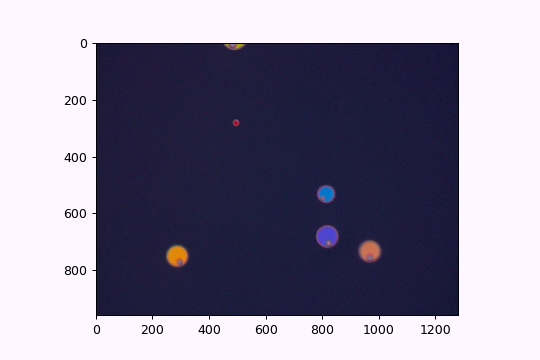

In [32]:
plt.imshow(im)

In [160]:
#pixel map
#yellow/orange island: px[col][row] = 294, 742
#purple island: 819, 667
#blue island: 824, 530
#red island: 493, 279
#orange island: 969, 729

#now, get these pixel maps

island_coords = [(742,292),(667,819), (530,824), (279,493), (729,969)]
island_px = [im[i_cord] for i_cord in island_coords]

In [161]:
island_px #these are in rgb values, need to convert to linear colour space

[array([232, 150,   2], dtype=uint8),
 array([ 82,  85, 202], dtype=uint8),
 array([  5, 133, 196], dtype=uint8),
 array([153,  24,  63], dtype=uint8),
 array([210, 128,  80], dtype=uint8)]

In [200]:
island_xyz = [colour.sRGB_to_XYZ(col/255) for col in island_px]

In [214]:
island_xyz


[array([ 0.44196015,  0.38972881,  0.05250567]),
 array([ 0.17388845,  0.12555105,  0.57384   ]),
 array([ 0.18413922,  0.20792845,  0.55267456]),
 array([ 0.14360707,  0.07784454,  0.05448282]),
 array([ 0.35745481,  0.29719168,  0.11441797])]

In [226]:
#Now, find the most likely retardence by minimizing the mse error for island colour and the retardence chart
#we calculated earlier
delE = np.array([[colour.delta_E(colour.XYZ_to_Lab(c1),colour.XYZ_to_Lab(c2/100), metric = 2000) for c2 in XYZ] for c1 in island_xyz])
ret = np.array([retL[i.argmin()] for i in delE])
ret_col = np.array([sRGB[i.argmin()] for i in delE])

In [227]:
ret

array([ 0.444,  0.59 ,  0.63 ,  0.499,  0.473])

<IPython.core.display.Javascript object>


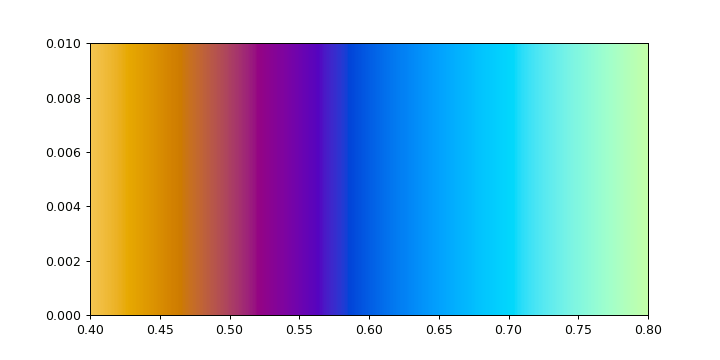

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [228]:
fig,ax = plt.subplots(figsize= (8,4))
#ax.axis('off')
ax.imshow(mlChart, extent= (.4,.8,0,.01), aspect='auto')

In [223]:
#pixel map
#yellow/orange island: px[col][row] = 294, 742
#purple island: 819, 667
#blue island: 824, 530
#red island: 493, 279
#orange island: 969, 729


<IPython.core.display.Javascript object>


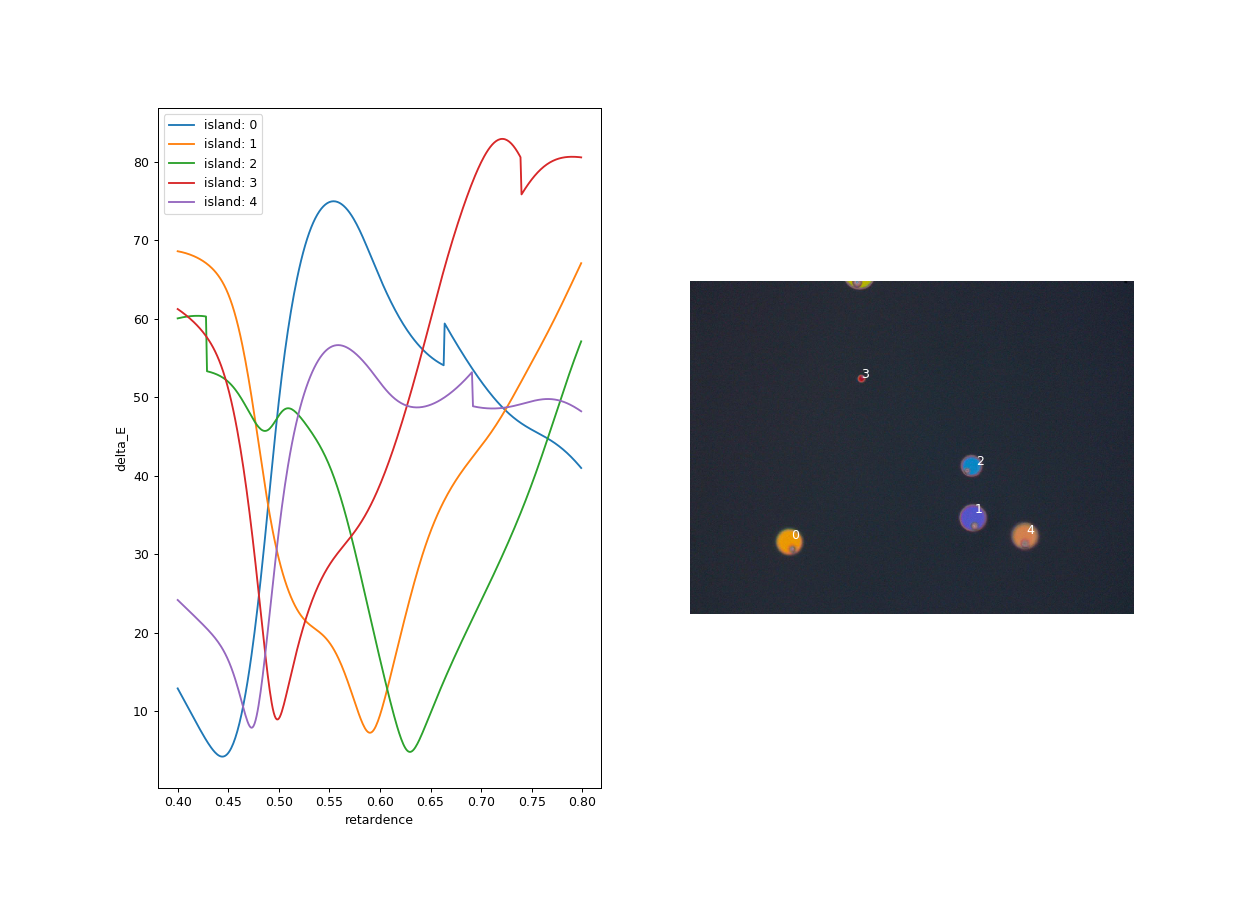

In [236]:
fig1, [ax1,ax2] = plt.subplots(nrows=1,ncols=2, figsize=(14,10))
ax2.imshow(im)
ax2.axis('off')
for i,island in enumerate(delE):
    ax1.plot(retL,island, label = 'island: {}'.format(i))
    ax1.set_xlabel('retardence')
    ax1.set_ylabel('delta_E')
    ax2.text(*island_coords[i][::-1], '{}'.format(i), color='white')
ax1.legend(loc='best')

    

In [ ]:
swatch = np.zeros([400,400,3]).astype('int')
fig2, aList = plt.subplots(nrows=2,ncols=3,figsize=(8,6))
a_i = 0
aList = aList.flatten()
for i, px in enumerate(island_px):
    swatch[:,:200,:] = px
    swatch[:,200:,:] = 255*ret_col[i]
    aList[a_i].axis('off')
    aList[a_i].imshow(swatch)
    aList[a_i].text(0,400,'measured')
    aList[a_i].text(200,200,'michel-levy colour')
    a_i +=1
    

<IPython.core.display.Javascript object>

## Summary
So, this is the general outline for how to do this:
convert everything to linear XYZ space, for calculating the difference between colour's, you additionally have to convert to LAB space, and then you can compare the difference between the colours using the delta_E function. The retardence is the birefringece X thickness, so if you know the birefringence of your material, this gives you a thickness measurement.

Unfortunately, it doesn't look good. You can do better comparing by eye for this data set-- this approach is great for detecting 'changes' in birefringence, but it is currently doing a bad job detecting the birefringence.

UPDATE: I improved it, so it is doing a fair job now. The problem was that the function sd_To_XYZ outputs numbers from 0-100, but every other conversion function (XYZ_to_RGB, XYZ_to_Lab) expects an input range of 0-1, so you have to rescale by 100 everywhere. Once I did that, the output looks pretty good, actually!

Things to improve:
1. Explore different metrics/spaces (the colour differences are rather large, and the website[1], mentions that differences over 10 are unable to be calculated well, and are actually meaningless. So, either implement your own formula for calculating large differences (there are some out there[2]).
2. Improve the spectral distribution to more closely match experiment. The michel-levy chart tells you what happens for a flat spectrum-- every single wavelength is represented equally. However, we don't have a flat distribution-- for instance, we have significantly more green light coming in than red-- this will be reflected in the reflected birefringence, and needs to be accounted for. I have some standard spectrum, but you could do better by using the actual spectrum of our lightsource



^[1]: https://colab.research.google.com/drive/1NRcdXSCshivkwoU2nieCvC3y14fx1X4X#sandboxMode=true&scrollTo=Ys_7LAHZdOEO

^[2]: https://stackoverflow.com/questions/58027500/what-is-the-interval-of-the-return-values-of-delta-e-functions-for-comparing-cie/58038022#58038022